## MINI CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

tf.get_logger().setLevel('ERROR')

**Stap 1: Laad het VGG16-model**

In [2]:
model = VGG16(weights='imagenet') 

**Stap 2: Laad en toon de originele afbeelding**

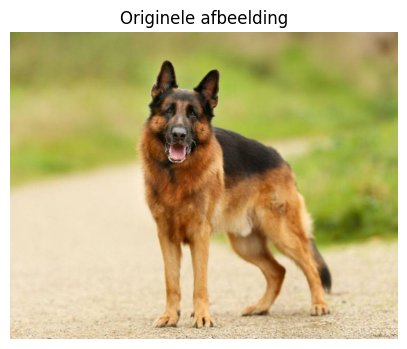

In [3]:
img_path = 'dog.jpg'
original_img = image.load_img(img_path)
plt.figure(figsize=(5, 5))
plt.imshow(original_img)
plt.title('Originele afbeelding')
plt.axis('off')
plt.show()

**Stap 3: Converteer afbeelding naar 224x224 pixels (VGG16-standaard)**

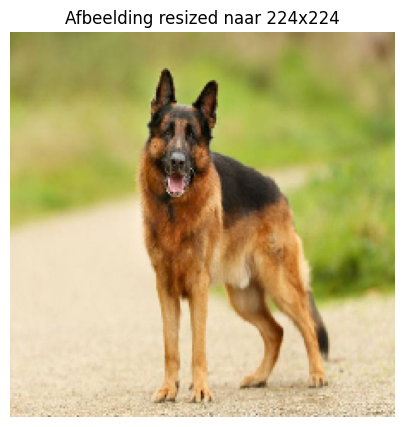

In [4]:
resized_img = image.load_img(img_path, target_size=(224, 224))
plt.figure(figsize=(5, 5))
plt.imshow(resized_img)
plt.title('Afbeelding resized naar 224x224')
plt.axis('off')
plt.show()

**Stap 4: Zet de afbeelding om naar een NumPy-array (soort python list)**

In [5]:
img_array = image.img_to_array(resized_img)
print("Vorm van de afbeelding als array:", img_array.shape) 

# Uitkomst: (224, 224, 3) → Dit betekent: 224 pixels breed, 224 pixels hoog, 3 kleurkanalen (RGB).

Vorm van de afbeelding als array: (224, 224, 3)


**Stap 5: Toon de eerste 5 pixels van de bovenste rij (RGB-waarden)**

Originele RGB-waarden (eerste 5 pixels in de bovenste rij):
[[124. 129.  49.]
 [128. 133.  53.]
 [132. 137.  57.]
 [130. 135.  55.]
 [132. 139.  59.]]


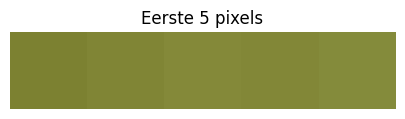

In [7]:
# Print de eerste 5 pixels in de bovenste rij als tekst
print("Originele RGB-waarden (eerste 5 pixels in de bovenste rij):")
print(img_array[0, :5])  # Print eerste 5 pixels

# Selecteer de eerste 5 pixels als een klein afbeeldingsfragment
mini_img_first = img_array[:1, :5]  # Eerste rij, eerste 5 kolommen
mini_img_first = mini_img_first.astype(int)  # Zorg dat het integers zijn

# Visualiseer de eerste 5 pixels als een mini-afbeelding
plt.figure(figsize=(5, 1))
plt.imshow(mini_img_first)
plt.title("Eerste 5 pixels")
plt.axis('off')
plt.show()


**Stap 6: Normaliseren met preprocess_input()**

In [8]:
img_array_expanded = np.expand_dims(img_array, axis=0)  # Voeg batchdimensie toe
img_array_preprocessed = preprocess_input(img_array_expanded)  # Normaliseren

De genormaliseerde waarde wordt berekend als:

genormaliseerd = originele waarde - ImageNet-gemiddelde

**ImageNet-gemiddelden per kleurkanaal:**
- **Rood (R):** `123.68`
- **Groen (G):** `116.78`
- **Blauw (B):** `103.94`

**Voorbeeldberekening:**
```python
R = 124.0 - 123.68  # = 0.32
G = 129.0 - 116.78  # = 12.22
B = 49.0 - 103.94   # = -54.94

waarom?
-waarden zijn niet meer tussen 0 en 255, maar verschuiven naar een bereik gecentreerd rondom 0.
-positief getal is hoger dan gemiddeld
-negatief getal is lager dan gemiddeld

**Stap 7 : Modelvoorspelling uitvoeren**

In [11]:
predictions = model.predict(img_array_preprocessed)
decoded_predictions = decode_predictions(predictions, top=3)[0]

1/1 [==============================] - 1s 729ms/step


**Stap 8: Toon de voorspelling**

In [12]:
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2%})")

1: German_shepherd (91.83%)
2: malinois (7.17%)
3: muzzle (0.33%)
